<a href="https://colab.research.google.com/github/gustavovazquez/ML/blob/main/ML_Datasets_no_balanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UCU - Datasets no balanceados

# ¿Qué es un dataset no balanceado en el aprendizaje automático?

Dado un conjunto de datos con etiquetas/clases conocidas, modelamos para predecir a qué clase pertenece una nueva observación (problema de clasificación). Tenemos datos no balanceados cuando el número de observaciones entre las clases es notoriamente diferente.

Por ejemplo, en un conjunto de datos de transacciones con tarjeta de crédito, podría haber un 99.9% de transacciones legítimas y solo un 0.1% de fraudes. Este es un conjunto de datos altamente no balanceado.

Entonces, ¿cuál es el problema con los datos no balanceados en el aprendizaje automático?

Si bien un dataset con un debalance leve no sería un problema, un conjunto de datos altamente desbalanceados podría causar problemas en nuestras predicciones de clasificación. Esto se debe a que la mayoría de los algoritmos de aprendizaje automático dependen de tener datos suficientes. Cuando algunas de las clases tienen pocos datos, el algoritmo no puede predecir correctamente su resultado.

Volviendo al ejemplo de detección de fraude con tarjetas de crédito. Dado que los datos fraudulentos están subrepresentados, un algoritmo de aprendizaje automático a menudo ofrece malas predicciones para tales clases. Esto es problemático porque queremos detectar transacciones fraudulentas e identificarlas (es lo que definimos como clase de interés).

Además de la detección de fraudes con tarjetas de crédito, otras áreas también tienden a tener conjuntos de datos altamente no balanceados. Por ejemplo:

- Predicción de reclamaciones/detección de fraudes en compañías de seguros.
- Detección de correo no deseado (spam).
- Predicción de la rotación/conversión de clientes.

Dado que la clasificación del aprendizaje automático puede ser binaria (2 clases) o multiclase, el problema de datos no balanceados puede aplicarse a ambos. Esta lectura se centrará en datos no balanceados en el aprendizaje automático para clases binarias, pero puedes extender el concepto a clases múltiples.

## Métricas de evaluación: la trampa de accuracy
Antes de sumergirnos en nuestro ejemplo, hablemos de las métricas de evaluación. Esta es una elección crítica para un conjunto de datos no balanceado.

Para problemas de clasificación, a menudo usamos accuracy como métrica de evaluación. Es fácil de calcular y intuitiva:

$$ Accuracy = # de predicciones correctas / # de predicciones totales $$

Pero es engañoso para conjuntos de datos altamente desbalanceados. En el ejemplo de detección de fraude con tarjetas de crédito, podemos configurar un modelo para clasificar siempre las nuevas transacciones como legítimas. La precisión podría ser alta, un 99.9% si el 99.9% en el conjunto de datos es todo legítimo.

En principio el modelo es increíblemente preciso, sin embargo nuestro objetivo es detectar el fraude (nuestra clase de interés), por lo que un modelo así es inútil.

Por lo tanto, para el conjunto de datos no balanceado, debemos observar una imagen más amplia de los resultados de predicción. Podríamos usar otras métricas de evaluación como el Área Bajo la Curva ROC (AUC), f1-score.

En este tutorial, utilizaremos el AUC como métrica de evaluación. Es una métrica única y fácil de usar. El AUC tiene el valor de 1 cuando el clasificador puede predecir el 100% correctamente.

Calcularemos el AUC utilizando el conjunto de datos no balanceado original, frente a los conjuntos de datos rebalanceados. Sin embargo, ten en cuenta que la mejora varía según los diferentes conjuntos de datos o algoritmos de aprendizaje automático.


# Ejemplo de un dataset desbalanceado

El conjunto de datos trata sobre abalones (molusco marino con caparazón en forma de oído o caracol). Nuestro objetivo es identificar si un abalón pertenece a una clase específica de 19. Así que se trata de un problema de clasificación binaria, ya sea positiva (clase 19) o negativa (resto).

In [136]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/gustavovazquez/datasets/main/abalone19.dat', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4174 non-null   object 
 1   Length          4174 non-null   float64
 2   Diameter        4174 non-null   float64
 3   Height          4174 non-null   float64
 4   Whole_weight    4174 non-null   float64
 5   Shucked_weight  4174 non-null   float64
 6   Viscera_weight  4174 non-null   float64
 7   Shell_weight    4174 non-null   float64
 8   Class           4174 non-null   object 
dtypes: float64(7), object(2)
memory usage: 293.6+ KB


In [137]:
df['Class'].value_counts()


,count
Class,
negative,4142
positive,32


In [138]:
df['Sex'].value_counts()

,count
Sex,
M,1526
I,1341
F,1307


In [139]:
# mapeamos la columna "Class" "negative" a 0 y "positive" a 1
df['Class'] = df['Class'].map({'negative': 0, 'positive': 1})

In [140]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0
...,...,...,...,...,...,...,...,...,...
4169,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,0
4170,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,0
4171,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0
4172,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0


In [141]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

<Axes: xlabel='Class'>

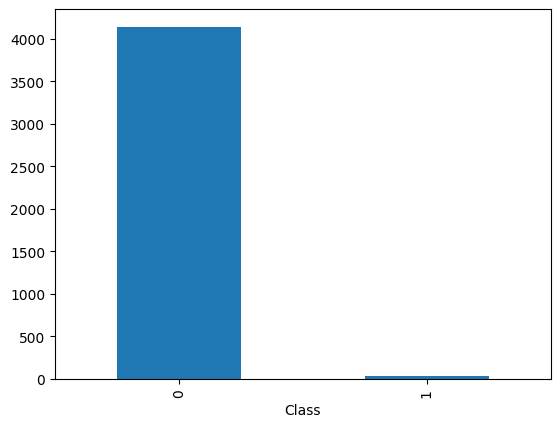

In [142]:
# Qué porcentaje hay de cada clase?
df['Class'].value_counts(normalize=True)
# Hacemos un histograma para que quede bien claro
df['Class'].value_counts().plot(kind='bar')

Vamos a dividir el conjunto de datos en conjuntos de entrenamiento (80%) y prueba (20%). Podemos utilizar la función ```train_test_split``` de ```sklearn``` con el argumento ```stratify``` basado en las categorías de ```Class```.
El argumento ```stratify``` en ```train_test_split``` sirve para mantener la misma proporción de clases (u otra variable categórica) tanto en el conjunto de entrenamiento como en el de prueba. En problemas de clasificación desbalanceados esto es especialmente importante, porque:

- Si no usás ```stratify```, el muestreo aleatorio puede generar conjuntos con distribuciones distintas (por ejemplo, que el test set tenga todavía menos ejemplos de la clase minoritaria, o incluso ninguno).

- Con ```stratify=y``` (```y``` es la variable dependiente usada), la división preserva la proporción de clases que tenías en el dataset original, garantizando representatividad en ambos subconjuntos.


In [143]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=888)

features = df_train.drop(columns=['Class']).columns

In [144]:
df_train['Class'].value_counts()

,count
Class,
0,3313
1,26


In [145]:
df_test['Class'].value_counts()

,count
Class,
0,829
1,6


## ¿Cómo podemos tratar datasets no balanceados?

## 1. Consiguiendo más datos!
Esta es una técnica útil que a menudo se pasa por alto. Ampliar la muestra nos ayuda a obtener más información sobre la clase minoritaria.

Sin embargo, esta técnica no siempre es factible. Para nuestro ejemplo de datos, no hay forma de que podamos recopilar medidas de más abalones.

Pero supongamos que trabajas en una compañía de tarjetas de crédito; generalmente es fácil ampliar la muestra de datos de transacciones de un mes a dos o tres meses. En un período más largo, es posible que encuentres más transacciones fraudulentas. Aunque los datos sigan estando desequilibrados, tendrás más observaciones de la clase minoritaria para aplicar otras técnicas que se describen a continuación.

# 2. Sobremuestreo (Oversampling)
Cuando los datos tienen categorías desequilibradas, un pensamiento natural es equilibrarlos. Podemos aumentar el número de la clase minoritaria o disminuir el número de la clase mayoritaria. Esto se puede hacer mediante el remuestreo.
Comencemos con el sobremuestreo más popular, que agrega ejemplos de la clase minoritaria para equilibrar el conjunto de datos.

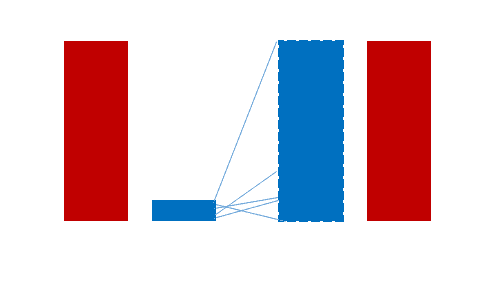

Existen diferentes métodos de sobremuestreo. A continuación, cubriremos algunos de los más conocidos:

- Sobremuestreo aleatorio simple: el enfoque básico de muestreo aleatorio con reemplazo de la clase minoritaria.
- Sobremuestreo con reducción: basado en muestreo aleatorio, se agrega algo de ruido/reducción para dispersar las nuevas muestras.
- Sobremuestreo utilizando SMOTE: sintetiza nuevas muestras basadas en la clase minoritaria.

Aplicaremos cada una de estas técnicas de sobremuestreo a nuestro conjunto de datos de ejemplo.

### Sobremuestreo aleatorio simple
Comenzaremos con el sobremuestreo aleatorio simple. Este es un enfoque sencillo. Simplemente tomamos copias/muestras con reemplazo de la clase minoritaria hasta que tenga el mismo número de ejemplos que la clase mayoritaria.

Usaremos dos formas de lograr esto en Python. Una utiliza la biblioteca pandas, que es más transparente para que puedas entender el proceso. La otra utiliza la biblioteca imbalanced-learn, que requiere menos código para implementar. Ambos producen los mismos resultados, por lo que puedes elegir cualquiera de ellos.

Con el código a continuación, generamos un nuevo conjunto de datos de entrenamiento equilibrado:

- Calcular num_to_oversample: cuántas copias adicionales de la clase minoritaria necesitamos para equilibrar los datos.
- Generar muestras de datos de entrenamiento de la clase minoritaria, con reemplazo.
- Concatenar la nueva muestra con el conjunto de datos de entrenamiento original.

In [146]:
msk = df_train['Class'] == 1
num_to_oversample = len(df_train) - 2*msk.sum()
df_positive_oversample = df_train[msk].sample(n=num_to_oversample, replace=True, random_state=888)
df_train_oversample = pd.concat([df_train, df_positive_oversample])
df_train_oversample['Class'].value_counts()

,count
Class,
0,3313
1,3313


A fines de simplificar el problema, aplicamos un método de regresión logística:

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

clf = LogisticRegression(random_state=888)

clf.fit(df_train_oversample[features], df_train_oversample['Class'])
y_pred = clf.predict_proba(df_test[features])[:, 1]

roc_auc_score(df_test['Class'], y_pred)

np.float64(0.8389626055488542)

El valor del AUC (Área Bajo la Curva ROC) para este modelo es 0.838962605548854. Este es un resultado decente, pero ¿cómo se compara con el uso del conjunto de datos original?

Usando ```imbalanced-learn```

Además de pandas, también podemos utilizar la biblioteca ```imbalanced-learn``` para realizar un sobremuestreo aleatorio.

A continuación, aplicamos ```RandomOverSampler``` para ajustar y remuestrear el conjunto de datos de entrenamiento. Esto nos proporciona X_resampled e y_resampled, las características y el objetivo del nuevo conjunto de entrenamiento equilibrado. Como puedes ver, y_resampled tiene dos clases, 0 y 1, y también está equilibrado (la identificación de las cantidades de cada clase se hace en forma automática).

In [148]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=888)
X_resampled, y_resampled = ros.fit_resample(df_train[features], df_train['Class'])
y_resampled.value_counts()

,count
Class,
0,3313
1,3313


Hemos establecido el valor de random_state como el mismo entero que en el ejemplo de pandas, por lo que generamos el mismo conjunto de entrenamiento equilibrado. Sin embargo, como puedes ver, imblearn requiere menos código para hacerlo.

Luego, podemos aplicar la regresión logística de la misma manera y calcular la métrica del AUC. Da el mismo AUC de 0.838962605548854 que el método de pandas, ya que nuevamente usamos el mismo valor de random_state.

In [149]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

np.float64(0.8389626055488542)

### Sobremuestreo utilizando SMOTE
La última técnica de sobremuestreo que cubriremos es SMOTE (Synthetic Minority Oversampling Technique - Técnica de Sobremuestreo de Minorías Sintéticas). Es una técnica más sofisticada; el muestreo aleatorio es fácil, pero las nuevas muestras no agregan más información a los algoritmos de aprendizaje automático. SMOTE mejora eso.

SMOTE sobremuestrea la clase minoritaria creando ejemplos "sintéticos" en lugar de copias. Involucra algunos métodos, incluido vecinos más cercanos, para generar nuevos ejemplos "factibles".

### Funcionamiento de SMOTE

- Selección de ejemplos: SMOTE comienza seleccionando aleatoriamente un ejemplo de la clase minoritaria en el conjunto de datos original.

- Encontrar vecinos cercanos: Luego, SMOTE identifica los k vecinos más cercanos al ejemplo seleccionado. El valor de k se elige de antemano por el usuario y determina cuántos vecinos cercanos se considerarán al generar ejemplos sintéticos.

- Creación de ejemplos sintéticos: Para cada ejemplo seleccionado de la clase minoritaria, SMOTE genera ejemplos sintéticos interpolando características entre el ejemplo seleccionado y sus vecinos más cercanos. Esto se hace calculando la diferencia entre las características del ejemplo seleccionado y sus vecinos, multiplicándola por un valor aleatorio entre 0 y 1, y luego sumándola al ejemplo seleccionado. Ej: $A = (x_1, y_1), B = (x_2, y_2)
$. Luego SMOTE genera un nuevo punto mediante interpolación lineal: $
\text{nuevo} = A + \lambda \cdot (B - A)$, donde $\lambda \in [0,1]$ es un valor aleatorio. Es decir, el nuevo ejemplo sintético se ubica **en la línea que une** los puntos $A$ y $B$.

- Incorporación de ejemplos sintéticos: Los ejemplos sintéticos generados se agregan al conjunto de datos original, lo que aumenta el tamaño de la clase minoritaria. Esto se repite hasta que se alcance un cierto nivel de equilibrio en las proporciones de clases o hasta que se alcance un número deseado de ejemplos sintéticos.

- Entrenamiento de modelos: Después de aplicar SMOTE y equilibrar las clases, el conjunto de datos equilibrado se utiliza para entrenar modelos de aprendizaje automático. Los modelos pueden aprender de manera más efectiva debido a la mayor representación de la clase minoritaria en el conjunto de datos.


Podemos aplicar el sobremuestreo SMOTE a través de la biblioteca ```imblearn```. El proceso es similar al sobremuestreo aleatorio con reemplazo, pero utilizamos la clase SMOTE para remuestrear.

In [150]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
X_resampled, y_resampled = smote.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()


,count
Class,
0,3313
1,3313


In [151]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

np.float64(0.8564535585042219)

# 3. Undersampling
En la técnica de submuestreo reducimos el tamaño de la clase mayoritaria para equilibrarla con la clase minoritaria.
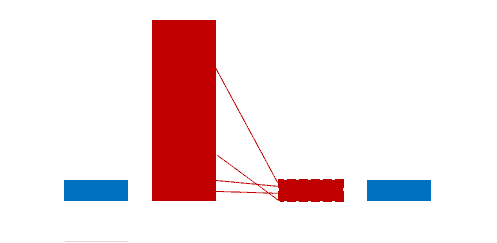

También existen muchos métodos de submuestreo. Cubriremos los siguientes populares:

- Submuestreo aleatorio simple: el enfoque básico de muestreo aleatorio de la clase mayoritaria.
- Submuestreo utilizando K-Means: sintetiza basándose en los centroides de los clústeres.
- Submuestreo utilizando enlaces Tomek: detecta y elimina muestras de los enlaces Tomek.

Aplicaremos cada una de estas técnicas de submuestreo a nuestro conjunto de datos de ejemplo.



### Submuestreo aleatorio simple
Comenzaremos con el submuestreo aleatorio simple. Vamos eliminando muestras aleatorias de la clase mayoritaria para que tenga el mismo tamaño que la clase minoritaria. Por lo tanto, existe el riesgo de eliminar información útil del conjunto de datos.


In [152]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=888)
X_resampled, y_resampled = rus.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

,count
Class,
0,26
1,26


In [153]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

np.float64(0.6467631684760756)

### Submuestreo utilizando K-Means
Además del muestreo aleatorio, también podemos utilizar el centroide del clúster del método K-Means como la nueva muestra de la clase mayoritaria. Esto significa que la nueva muestra de la clase mayoritaria ya no es igual a los datos originales. Están sintetizados con centroides de los clústers. Por lo tanto, la nueva muestra debería ser más representativa de los datos reales de la clase mayoritaria.


### Enlaces Tomek
Veamos el enfoque de submuestreo utilizando enlaces Tomek. Este método detecta enlaces Tomek y elimina muestras basándose en ellos.

¿Qué es el enlace Tomek?

Es un enlace entre dos muestras de clases diferentes. Cuando las dos muestras son vecinas más cercanas entre sí, forman un enlace Tomek.

En nuestro ejemplo del problema de clasificación binaria, un enlace Tomek es un par de ejemplos de cada clase que son los vecinos más cercanos en todo el conjunto de datos. Después de detectar tal enlace, podríamos eliminar los datos dentro del par. Por lo general, eliminamos la muestra de la clase mayoritaria para lograr el submuestreo, es decir, eliminar la clase mayoritaria cerca de la clase minoritaria. Esto elimina la ambigüedad entre las dos clases.
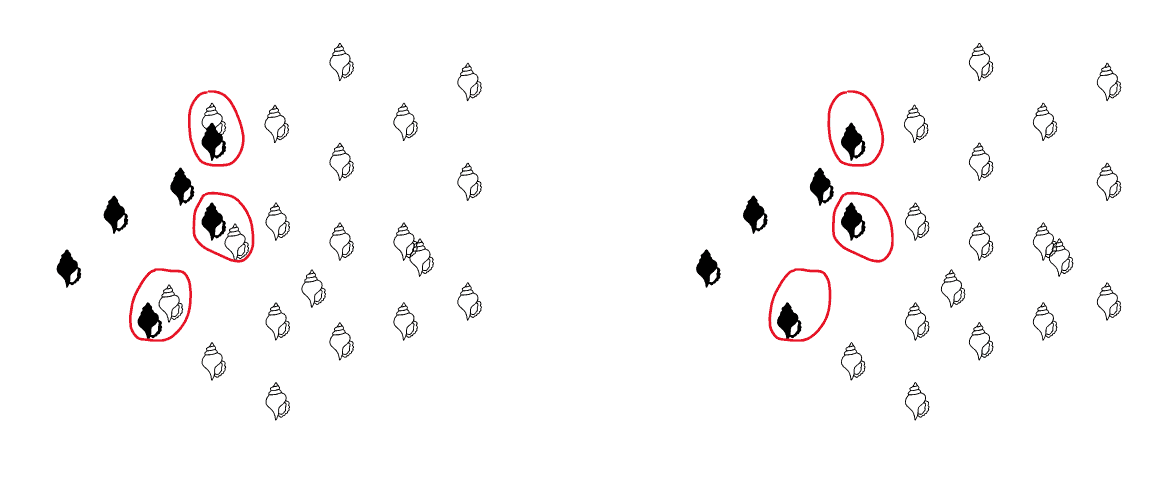

Por defecto, el método remueve valores de la clase mayoritaria, de modo que los datos pueden seguir permaneciendo desbalanceados (por esta razón debe utilizarse en combinación con otras técnicas).

In [154]:

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

,count
Class,
0,3298
1,26


In [155]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

np.float64(0.6825492561318858)

# 4. Combinando el Sobremuestreo y el Submuestreo
Cada una de las técnicas de sobremuestreo y submuestreo tiene sus ventajas y desventajas. A veces es bueno combinar sus fortalezas. En esta sección, veremos un ejemplo de sobremuestreo utilizando SMOTE y submuestreo utilizando enlaces Tomek.


## SMOTE y enlaces Tomek
El enfoque de sobremuestreo SMOTE podría generar muestras ruidosas, ya que crea datos sintéticos. Para resolver este problema, después de SMOTE, podríamos utilizar técnicas de submuestreo para limpiar. En este ejemplo, utilizaremos la técnica de submuestreo de enlaces Tomek.


In [156]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=888)
X_resampled, y_resampled = smote_tomek.fit_resample(df_train[features], df_train['Class'])

y_resampled.value_counts()

,count
Class,
0,3309
1,3309


Esto da como resultado un conjunto de datos equilibrado, con cada clase de tamaño 3309.

Vamos a repasar los detalles.

Como vimos, el conjunto de entrenamiento original tiene la clase 0 con un tamaño de 3313 y la clase 1 con un tamaño de 26. El enfoque SMOTE-Tomek primero hizo un sobremuestreo con SMOTE, lo que resultó en una muestra con ambas clases de tamaño 3313. Luego, la técnica de enlaces Tomek intervino y limpió los 'enlaces', lo que resultó en menos muestras en ambas clases.

En esta técnica SMOTE-Tomek, los pares de muestras de ambas clases que forman un enlace Tomek, se eliminan. Esto da como resultado un conjunto de datos con dos clases del mismo tamaño.

El AUC de la regresión logística con la técnica SMOTE-Tomek es 0.8564535585042219

In [157]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=888)

clf.fit(X_resampled, y_resampled)
y_pred = clf.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)

np.float64(0.8564535585042219)

# 5. Dando diferentes pesos a las clases
Además de remuestrear los datos, también podemos equilibrar las clases dando pesos diferentes a los datos. Como sabes, generalmente consideramos que cada observación tiene el mismo peso. Pero para conjuntos de datos desequilibrados, podemos equilibrar las clases poniendo más peso en las clases minoritarias.
Por ejemplo, supongamos que queremos que los pesos totales de las clases minoritarias y mayoritarias sean iguales. En ese caso, podemos utilizar la función ```compute_class_weight``` de ```scikit-learn```. El siguiente código estima los pesos para nuestro conjunto de datos de entrenamiento desequilibrado.

In [158]:
from sklearn.utils import compute_class_weight

weights = compute_class_weight('balanced', classes=df_train['Class'].unique(), y=df_train['Class'])
weights

array([ 0.50392394, 64.21153846])

Esto significa que si queremos que el conjunto de datos esté equilibrado, debemos darle un peso de 0.50392394 a los elementos de la clase mayoritaria y un peso de 64.21153846 a la clase minoritaria.

Verifiquemos que estos pesos realmente pueden equilibrar el conjunto de datos.

Utilizando el código a continuación, multiplicamos el recuento de cada clase por sus respectivos pesos.

In [159]:
print((df_train['Class'] == 0).sum()*weights[0])

print((df_train['Class'] == 1).sum()*weights[1])

1669.5
1669.5000000000002


¿Qué significa esto para un algoritmo de aprendizaje automático como la regresión logística?

Los diferentes pesos hacen que sea más costoso clasificar erróneamente una clase minoritaria que una clase mayoritaria; esto lo incorpora automáticamente el modelo en el cómputo de su función de pérdida.

En la clase ```LogisticRegression``` dentro de ```sklearn```, podemos aplicar diferentes pesos para equilibrar los datos utilizando el parámetro ```class_weight```. Por lo tanto, no necesitamos realizar los cálculos anteriores.

Podemos utilizar el código a continuación para aplicar la regresión logística a los conjuntos de datos con pesos diferentes, con el argumento adicional class_weight='balanced'. El resto del proceso es el mismo.

In [160]:
from sklearn.linear_model import LogisticRegression

clf_weighted = LogisticRegression(class_weight='balanced', random_state=888)
clf_weighted.fit(df_train[features], df_train['Class'])

y_pred = clf_weighted.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)



np.float64(0.8260956976276639)

Además de cambiar los pesos de las dos clases para equilibrarlas, también podemos especificar pesos personalizados para las clases positivas y negativas. Por ejemplo, el siguiente código da a la clase 1 un peso 100 veces mayor que la clase 0.

In [161]:
from sklearn.linear_model import LogisticRegression

clf_weighted = LogisticRegression(class_weight={0: 1, 1: 100}, random_state=888)

clf_weighted.fit(df_train[features], df_train['Class'])
y_pred = clf_weighted.predict_proba(df_test[features])[:, 1]

from sklearn.metrics import roc_auc_score
roc_auc_score(df_test['Class'], y_pred)



np.float64(0.8373542420587052)

# 7. Evitando data leakage con las técnicas de rebalanceo

- Error común: a efectos de simplificar los ejemplos hemos aplicado las técnicas de rebalanceo a todo el dataset antes de dividir en train/test → fuga de información.
- Solución: integrar el rebalanceo en un `Pipeline`. De esta forma el rebalanceo se aplica solo al conjunto de entrenamiento. Lo haremos con validación cruzada para una mejor validación.


In [162]:
# Definición del pipeline incluyendo SMOTE dentro para evitar fugas
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=888)),
    ("clf", LogisticRegression(class_weight="balanced"))
])